In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
dataset = "/content/drive/My Drive/neuroscience_project(emotions)/images_new/train_images"
folders = os.listdir(dataset)

In [0]:
test_set = "/content/drive/My Drive/neuroscience_project(emotions)/images_new/test_images"
test_folders = os.listdir(test_set)

In [0]:
with open("/content/drive/My Drive/neuroscience_project(emotions)/labels.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

In [0]:
Kc=[]
for img in content[0:]:
    x=img.split(" ")
    Kc.append(x)

In [0]:
import cv2
import numpy as np
X_train = []
Y_train = []
max_numbers = []
for img in Kc:

    img_name = img[7].replace("-",".") + "."+img[0]+"."+"tiff"
    
    if img_name in folders:
        
        img_open=cv2.imread("/content/drive/My Drive/neuroscience_project(emotions)/images_new/train_images/"+img_name)

        degrees=img[1:7]
        
        #print(img_name)
        
        img_open=np.array(img_open)

        j=0
        for i in degrees:
            j+=1
            if i==max(degrees):
                #print(j-1)
                max_numbers.append(j-1)
        
        #degrees=img[1:7]
        
        D=[]
        
        for d in degrees:
            D.append(float(d))
    
        Y_train.append(D)
        
    
        X_train.append(img_open)
    

In [0]:
import cv2
import numpy as np
X_test = []
Y_test = []
max_numbers_test = []
for img in Kc:

    img_name = img[7].replace("-",".") + "."+img[0]+"."+"tiff"
    
    if img_name in test_folders:
        
        img_open=cv2.imread("/content/drive/My Drive/neuroscience_project(emotions)/images_new/test_images/"+img_name)

        degrees=img[1:7]
        
        #print(img_name)
        
        img_open=np.array(img_open)

        j=0
        for i in degrees:
            j+=1
            if i==max(degrees):
                #print(j-1)
                max_numbers_test.append(j-1)
        
        #degrees=img[1:7]
        
        D=[]
        
        for d in degrees:
            D.append(float(d))
    
        Y_test.append(D)
        
    
        X_test.append(img_open)

## Prediction for the degrees for each class

In [0]:
X_train = (np.array(X_train)/ 255) - 0.5
Y_train = (np.array(Y_train) /5) - 0.5

In [0]:
X_test = (np.array(X_test)/ 255) - 0.5

In [12]:
from keras.layers import MaxPooling2D, BatchNormalization, Dropout
from keras.models import Model
from keras.layers import Input, Conv2D, Activation, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import plot_model


x = Input(shape=(256, 256, 3))#I have just write the right functions and layers as given above from Keras documentation
c1 = Conv2D(32, (3, 3), strides=(2, 2),padding='same')(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(64, (3, 3), strides=(1, 1),padding='valid')(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2) 
p2 = MaxPooling2D(pool_size=(2, 2))(a2)
c2 = Conv2D(64, (3, 3), strides=(1, 1),padding='valid')(p2)
a2 = Activation('relu')(c2) 
c2 = Conv2D(32, (3, 3), strides=(2, 2),padding='valid')(a2)
d2 = Dropout(0.25)(c2)
f2 = Flatten()(d2)

h3 = Dense(4000)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(0.5)(a3)
a3 = Dense(1000)(d3)
b3 = BatchNormalization()(a3)
a3 = Activation('relu')(b3)
d3 = Dropout(0.5)(a3)
z = Dense(100)(a3)
b3 = BatchNormalization()(z)
a3 = Activation('relu')(b3)
d3 = Dropout(0.5)(a3)
z = Dense(6)(d3)

model = Model(inputs=x, outputs=z)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
plot_model(model, to_file='model.png')
model.summary()

Using TensorFlow backend.














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 126, 126, 64)      256     

In [13]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [14]:
history = model.fit(X_train, Y_train, batch_size=8, epochs=700)#I get %66 when I increase the epoch to 66
#model.save('my_model_resolution.h5')



Epoch 1/700
179/179 [==============================] - 7s 37ms/step - loss: 1.7524
Epoch 2/700
179/179 [==============================] - 1s 8ms/step - loss: 1.0421
Epoch 3/700
179/179 [==============================] - 1s 8ms/step - loss: 0.8510
Epoch 4/700
179/179 [==============================] - 1s 8ms/step - loss: 0.8338
Epoch 5/700
179/179 [==============================] - 1s 8ms/step - loss: 0.7057
Epoch 6/700
179/179 [==============================] - 1s 8ms/step - loss: 0.6535
Epoch 7/700
179/179 [==============================] - 1s 8ms/step - loss: 0.5376
Epoch 8/700
179/179 [==============================] - 1s 8ms/step - loss: 0.5111
Epoch 9/700
179/179 [==============================] - 1s 8ms/step - loss: 0.4751
Epoch 10/700
179/179 [==============================] - 1s 8ms/step - loss: 0.4153
Epoch 11/700
179/179 [==============================] - 1s 8ms/step - loss: 0.3621
Epoch 12/700
179/179 [==============================] - 1s 8ms/step - loss: 0.3108
Epoch 13/7

In [0]:
x=model.predict(X_test[0:33])

In [16]:
Y_pred=(x + 0.5)*5
Y_pred

array([[3.2342343, 2.068236 , 1.835964 , 1.7762984, 1.7388678, 1.7229973],
       [1.5587085, 3.6228297, 1.9137825, 2.5832727, 3.2662158, 2.7441475],
       [1.9292421, 2.734121 , 1.7730862, 3.160236 , 3.1133568, 2.163347 ],
       [1.760988 , 2.7104702, 3.4529614, 2.732551 , 3.6575139, 3.3502426],
       [1.4844502, 3.6829681, 2.1052375, 2.3336163, 3.441229 , 3.068774 ],
       [1.4288689, 2.2053885, 1.8614588, 3.7605977, 4.032261 , 2.0940537],
       [2.2166169, 2.133165 , 4.095239 , 2.0219657, 2.264574 , 2.4880989],
       [2.3534882, 2.7643814, 2.1594605, 2.0830674, 2.343261 , 2.2804084],
       [1.472339 , 4.431842 , 1.556519 , 1.8893123, 2.4960508, 2.5415134],
       [2.3512883, 1.9714019, 4.316474 , 1.6981785, 1.9040166, 2.118909 ],
       [1.5126525, 2.4243393, 2.0427046, 4.017758 , 3.197625 , 2.0443993],
       [1.882896 , 3.2338712, 2.8811088, 2.072301 , 2.6454344, 3.1421754],
       [1.5215738, 3.6393323, 3.6138442, 2.0165746, 2.9329154, 3.9484322],
       [1.9125438, 3.1858

In [17]:
Y_test[0:33]

[[2.87, 2.42, 1.58, 1.84, 1.77, 1.77],
 [1.23, 4.39, 1.45, 2.61, 3.19, 2.71],
 [1.39, 2.03, 1.57, 4.58, 3.77, 1.68],
 [1.5, 2.97, 3.67, 2.83, 3.77, 3.8],
 [1.26, 4.13, 1.77, 2.4, 3.1, 2.74],
 [1.67, 1.97, 1.7, 4.6, 4.1, 1.77],
 [1.39, 3.0, 4.29, 2.32, 3.74, 4.13],
 [3.03, 2.45, 1.74, 2.0, 1.9, 1.77],
 [1.65, 4.26, 1.77, 1.94, 2.61, 2.77],
 [2.35, 1.81, 4.87, 1.81, 1.71, 2.29],
 [1.19, 2.16, 1.55, 4.74, 2.84, 1.39],
 [1.29, 3.52, 3.48, 2.03, 3.42, 3.35],
 [1.29, 3.13, 4.52, 2.55, 3.45, 4.19],
 [4.45, 1.29, 1.1, 1.19, 1.26, 1.19],
 [2.0, 1.77, 4.68, 1.81, 1.65, 2.03],
 [2.42, 1.84, 4.74, 1.94, 1.87, 2.06],
 [3.03, 2.32, 1.77, 1.74, 1.77, 1.68],
 [2.03, 2.29, 1.61, 2.71, 2.35, 1.87],
 [3.48, 2.19, 1.55, 1.68, 1.55, 1.58],
 [1.61, 2.52, 2.29, 2.68, 4.71, 3.19],
 [1.23, 4.06, 4.1, 2.32, 3.26, 4.26],
 [1.45, 2.35, 1.58, 4.23, 3.1, 1.81],
 [1.84, 2.29, 3.71, 2.35, 2.32, 2.13],
 [2.1, 2.13, 3.61, 2.16, 2.1, 2.06],
 [1.26, 4.26, 1.9, 2.87, 3.61, 3.35],
 [1.39, 4.42, 1.94, 2.77, 3.68, 3.81],
 [1

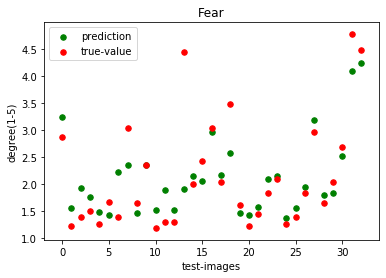

In [19]:
import matplotlib.pyplot as plt 

# x-axis values 
x = [ ]

for i in range(33):
  x.append(i)

predictions = []

for i in Y_pred:
  predictions.append(i[0])

ground_truth = []

for j in Y_test:
  ground_truth.append(j[0])


# plotting points as a scatter plot 
plt.scatter(x, predictions, label= "prediction", color= "green", 
			marker= "o", s=30) 
plt.scatter(x, ground_truth, label= "true-value", color= "red", 
			marker= "o", s=30) 
# x-axis label 
plt.xlabel('test-images') 
# frequency label 
plt.ylabel('degree(1-5)') 
# plot title 
plt.title('Fear') 
# showing legend 
plt.legend() 

# function to show the plot 
plt.show() 


In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred)

0.30172630668345735

## ALEX NET() - Classification based on maximum class

In [0]:
Y_train_class = []
for i in max_numbers:
  class_num = [0,0,0,0,0,0]
  class_num[i] = 1
  Y_train_class.append(class_num)


In [0]:
Y_test_class = []
for i in max_numbers_test:
  class_num = [0,0,0,0,0,0]
  class_num[i] = 1
  Y_test_class.append(class_num)

In [13]:
len(Y_test_class)

33

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
#np.random.seed(1000)
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4), padding="valid"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding="valid"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))
model.add(Activation("relu"))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))
model.add(Activation("relu"))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="valid"))
model.add(Activation("relu"))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation("relu"))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation("relu"))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation("relu"))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(6))
model.add(Activation("softmax"))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="rmsprop", metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 96)        34944     
_________________________________________________________________
activation_7 (Activation)    (None, 62, 62, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 256)       2973952   
_________________________________________________________________
activation_8 (Activation)    (None, 21, 21, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 384)        

In [0]:
Y_train_class = np.array(Y_train_class)

In [21]:
history = model.fit(X_train, Y_train_class, batch_size=8, epochs=50)

Epoch 1/50
179/179 [==============================] - 3s 14ms/step - loss: 12.2359 - acc: 0.2179
Epoch 2/50
179/179 [==============================] - 1s 5ms/step - loss: 12.5163 - acc: 0.2235
Epoch 3/50
179/179 [==============================] - 1s 5ms/step - loss: 12.5163 - acc: 0.2235
Epoch 4/50
179/179 [==============================] - 1s 5ms/step - loss: 12.5163 - acc: 0.2235
Epoch 5/50
179/179 [==============================] - 1s 5ms/step - loss: 12.5163 - acc: 0.2235
Epoch 6/50
179/179 [==============================] - 1s 5ms/step - loss: 12.5163 - acc: 0.2235
Epoch 7/50
179/179 [==============================] - 1s 5ms/step - loss: 12.5163 - acc: 0.2235
Epoch 8/50
179/179 [==============================] - 1s 5ms/step - loss: 12.5163 - acc: 0.2235
Epoch 9/50
179/179 [==============================] - 1s 5ms/step - loss: 12.5163 - acc: 0.2235
Epoch 10/50
179/179 [==============================] - 1s 5ms/step - loss: 12.5163 - acc: 0.2235
Epoch 11/50
  8/179 [>................

KeyboardInterrupt: ignored

In [22]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras import optimizers
import pandas as pd
import numpy as np
model = Sequential()
model.add(Convolution2D(64, 3,3,border_mode='same',input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))
adam = keras.optimizers.Adam(lr=0.5)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(256, 256,..., padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
activation_16 (Activation)   (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 254, 254, 64)      36928     
_________________________________________________________________
activation_17 (Activation)   (None, 254, 254, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 128)     73856     
_________________________________________________________________
activation_18 (Activation)   (None, 125, 125, 128)    

True

In [23]:
history = model.fit(X_train, Y_train_class, batch_size=8, epochs=50)

Epoch 1/50
179/179 [==============================] - 3s 16ms/step - loss: 2.3168 - acc: 0.2123
Epoch 2/50
179/179 [==============================] - 2s 12ms/step - loss: 1.7531 - acc: 0.2346
Epoch 3/50
179/179 [==============================] - 2s 13ms/step - loss: 1.6601 - acc: 0.3296
Epoch 4/50
179/179 [==============================] - 2s 13ms/step - loss: 1.4624 - acc: 0.5140
Epoch 5/50
179/179 [==============================] - 2s 13ms/step - loss: 1.0808 - acc: 0.6536
Epoch 6/50
179/179 [==============================] - 2s 13ms/step - loss: 0.8489 - acc: 0.7374
Epoch 7/50
179/179 [==============================] - 2s 13ms/step - loss: 0.6386 - acc: 0.7821
Epoch 8/50
179/179 [==============================] - 2s 13ms/step - loss: 0.4656 - acc: 0.8380
Epoch 9/50
179/179 [==============================] - 2s 13ms/step - loss: 0.2632 - acc: 0.8939
Epoch 10/50
179/179 [==============================] - 2s 13ms/step - loss: 0.2069 - acc: 0.9385
Epoch 11/50
179/179 [==================

In [0]:
x=model.predict(X_test[0:33])

In [0]:
k=np.argmax(x,axis=1)

In [0]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(max_numbers_test,k)

0.6363636363636364